In [1]:
from proj1_helpers import load_csv_data, predict_labels, create_csv_submission
#import created_helpers as ch
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
data_path = './'

In [3]:
train_data_path = os.path.join(data_path, "train.csv")
test_data_path = os.path.join(data_path,"test.csv")

y_train, x_train, ids_train = load_csv_data(train_data_path)
y_test, x_test, ids_test = load_csv_data(test_data_path)

In [4]:
x_train.shape
data_train = pd.read_csv(train_data_path)
data_test = pd.read_csv(test_data_path)
data_train.head()
data_train.describe()

,Id,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [5]:
def standardize(x):
    ''' fill your code in here...
    '''
    centered_data = x - np.mean(x, axis=0)
    std_data = centered_data / np.std(centered_data, axis=0)
    
    return std_data

In [22]:
y_train[y_train == -1] = 0
x_train_s = standardize(x_train)
x_train_sd = np.insert(x_train_s,0,1,axis=1)

x_test_s = standardize(x_test)
x_test_sd = np.insert(x_test_s,0,1,axis=1)

In [23]:
random.seed(42)
initial_gamma = 1
n = x_train_sd.shape[1]
m = x_train_sd.shape[0]
initial_w = np.array([0] * n)
max_iters = 1500

def sigmoid_fn(z):
    #print(z)
    h = 1 / (1 + np.exp(-z))
    return h

def logistic_regression_cost(y, tx, w):
    #print("w: ", w)
    z = tx.dot(w)
    #print("z: ", z)
    h = sigmoid_fn(z)
    #print("h: ", h)
    #print("np.log: ", np.log(h))
    first_term = -y.T.dot(np.log(h))
    #print("first term: ", first_term)
    second_term = (1 - y).T.dot(np.log(1 - h))
    #print("second term: ", second_term)
    cost = (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) / m
    #print("cost: ", cost)
    #print()
    return cost

def logistic_regression_gradient(y, tx, w):
    z = tx.dot(w) # m,n x n,1 -> m,1
    h = sigmoid_fn(z)
    grad = tx.T.dot(h - y) / m
    return grad

def logistic_regression_gradient_descent(y, tx, w, max_iters, gamma):
    # start the logistic regression
    J_history =[]
    for i in range(max_iters):
        loss = logistic_regression_cost(y, tx, w)
        grad = logistic_regression_gradient(y, tx, w)
        w = w - gamma * grad
        J_history.append(loss)
    #return w, loss
    print(w)
    return w, J_history

[-9.11170177e-01  2.18721488e-01 -6.53827211e-01 -1.07972392e+00
  2.19434286e-01 -1.11539738e-01  1.44949002e+00 -1.55117420e-01
  1.03243740e+00 -3.29534072e-03 -3.59433205e-02 -7.62990256e-01
  2.29139822e-01 -1.10813002e-01  5.50795078e-01 -1.56791098e-03
 -2.14699361e-03  1.04373010e+00 -2.52336949e-03  7.11057934e-03
  2.37573371e-01  1.03321692e-03 -2.01184651e-01 -4.68788643e-01
  1.35241636e-01  1.53506479e-01  1.53017483e-01 -1.29304723e-01
 -1.25003820e-01 -1.31102041e-01 -4.03330949e-01]


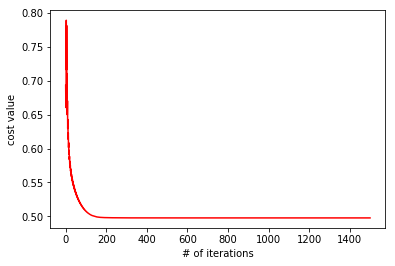

In [24]:
optimal_weight, J_history = logistic_regression_gradient_descent(y_train, x_train_sd, initial_w, max_iters, initial_gamma)

plt.plot(np.arange(max_iters), J_history, 'r') 
# better to use arange than linspace when dealing with integer interval steps 

plt.xlabel('# of iterations')
plt.ylabel('cost value')
plt.show()
#create_csv_submission(ids_test, y_pred,'logistic_regression' + str(datetime.now()) + '.csv')

In [25]:
def predict_probs(w, X):
    return sigmoid_fn(np.dot(X, w))

def predict(w, X, threshold=0.5):
    y_pred = predict_probs(w, X)
    y_pred[np.where(y_pred < threshold)] = -1
    y_pred[np.where(y_pred >= threshold)] = 1
    return y_pred

In [26]:
y_pred = predict(optimal_weight, x_test_sd)
y_pred

array([-1., -1., -1., ...,  1.,  1., -1.])

In [27]:
def accuracy(y_pred, y):
    assert len(y_pred) == len(y)
    correct = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y[i]:
            correct += 1
    return correct / len(y)

x_test_sdd = np.insert(x_test,0,1,axis=1)
y_pred = predict(optimal_weight, x_test_sdd)       
print(accuracy(y_pred, y_test))

x_train_sdd = np.insert(x_train,0,1,axis=1)
y_pred = predict(optimal_weight, x_train_sdd)       
print(accuracy(y_pred, y_train))

0.25697858995702505
0.122928


In [28]:
x_test_sdd.dot(optimal_weight)

array([-1387.16822396,  -765.97986276, -1183.02306264, ...,
       -1157.7158591 ,  -739.41090234, -1189.71216396])

In [13]:
def reg_logistic_regression_cost_grad(y, tx, w, lambda_):
    loss = logistic_regression_cost(y, tx, w) + lambda_ * np.squeeze(w.T.dot(w))
    gradient = logistic_regression_gradient(y, tx, w) + 2 * lambda_ * w
    return loss, gradient

def reg_logistic_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    loss, gradient = reg_logistic_regression_cost_grad(y, tx, w, lambda_)
    w = w - gamma * gradient
    return loss, w
  
def reg_logistic_regression(y, tx, lambda_,initial_w, max_iters, gamma):
    for i in range(max_iters):
        if (i > 0):
            gamma = 1 / i
        for minibatch_y, minibatch_tx in batch_iter(y, tx, 1): # O(1) runtime
            loss, initial_w = reg_logistic_gradient (minibatch_y, minibatch_tx, initial_w, gamma, lambda_)
    return initial_w, loss

In [14]:
for i in range(len(y_test),2500):
    print(y_test[i])

In [15]:
for i in range(len(y_train),2500):
    print(y_train[i])